### Ultra low dimensions

In [1]:
using Plots
using TimeIt
using KernelDensity
include("BPS.jl")
include("NRG.jl")

NRG_ss_fixed_attempts (generic function with 5 methods)

#### Initialise a few things first

In [2]:
d, Nobs = 5, 20
c = 0.5
α_true = simulate_α(c, Nobs)
β_true = -ones(d);

In [3]:
X = rand(d, Nobs)
y = [rand(1)[1] < 1/(1 + exp(-α_true[i]-dot(β_true,X[:,i]))) for i in 1:Nobs] .+ 0
mean(y)

0.05

In [4]:
α_0, β_0 = copy(α_true), copy(β_true)
max_times = [ones(Nobs); 2*ones(d)]
mb_size = 1
modprint = 10
include_α, replace, Print = true, false, true
σ_α, σ_β = 2, 2

(2, 2)

#### NRG:

0.52 minutes to run 
3274.5 bounces on average

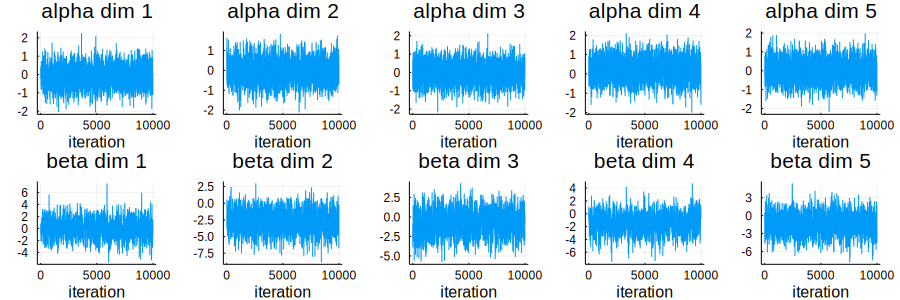

In [17]:
start = time()
ξ_traj, abounce_counter, bounce_counter = NRG_ss(X, y, 10^5, max_times, α_0, β_0, mb_size, 
                                                 c, σ_α, σ_β, modprint, include_α, replace)  
print( round((time()-start)/60, 2), " minutes to run \n")
print(round(mean(bounce_counter),1), " bounces on average")
plot_traj(ξ_traj, Nobs)

#### BPS:

In [18]:
max_bounces = Int(round(mean(bounce_counter)))
max_attempts = 10^7;

7.8% of bounces accepted 
0.13 minutes to run 
2140 refreshments, 3274 bounces.

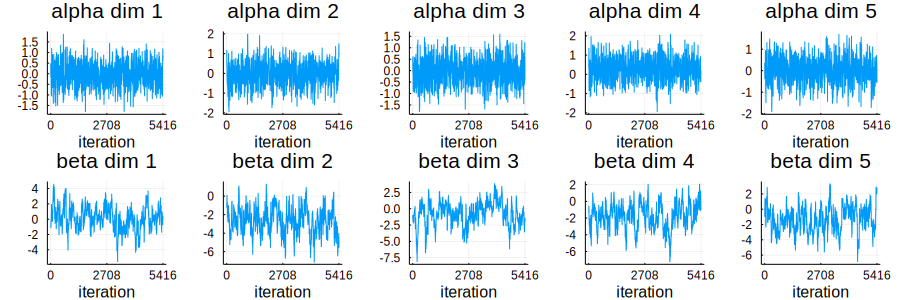

In [19]:
λ_ref = 0.1
start = time()
s_BPS, b_BPS, refreshments, bounces = BPS_ss(X, y, max_attempts, max_bounces, mb_size, α_0, β_0, c, σ_α, σ_β, λ_ref)
print( round((time()-start)/60, 2), " minutes to run \n")
print(refreshments, " refreshments, ", bounces, " bounces.")
plot_traj(s_BPS, Nobs)

In [20]:
samples = extract_samples(s_BPS, b_BPS, 1);

#### Plot kernel density estimates to compare the accuracy of the two methods

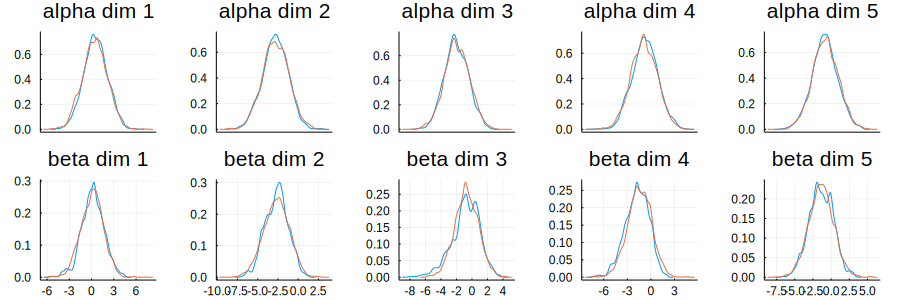

In [21]:
plot_kde(samples, ξ_traj, Nobs)